## Bottom Line Up Front (BLUF)

## SUMMARY:

Here we have analysed the Iris Dataset: the last 45 instances of iris versicolor, and the first 40 instances of iris virginica using only the sepal_width and petal_width as the predictors

The accuracies of the Classifiers we have used are as follows:

Perceptron - 95.45%

Adaline - 92.94%

AdalineGD after feature scaling - 94.12%

AdalineSGD - 92.94%

Logistic Regression Classifier - 92.94%

Sklearn Implementation of SGD Classifier - 92.94%

Based on the observations Perceptron has the highest accuracy but this will change according to the random state and as we alter the learning rates

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")

In [2]:
# Import libraries
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#Reading the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Confusion Matrix & Accuracy

# This mplements a 2D confusion matrix calculation
def confusion_matrix(y_hat,y):
  confusion = np.zeros([2,2])
  for i in range(0,len(y)):
    if (y_hat[i] == 1) & (y[i] == 1):
      confusion[1,1] = confusion[1,1] + 1
    if (y_hat[i] == 1) & (y[i] == -1):
      confusion[0,1] = confusion[0,1] + 1 
    if (y_hat[i] == -1) & (y[i] == 1):
      confusion[1,0] = confusion[1,0] + 1 
    if (y_hat[i] == -1) & (y[i] == -1): 
      confusion[0,0] = confusion[0,0] + 1 
  return(confusion)

In [5]:
# Function to plot two-variable decision regions of a classifier 
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black') 

## Plotting the Iris Data (Versicolor VS Verginica)

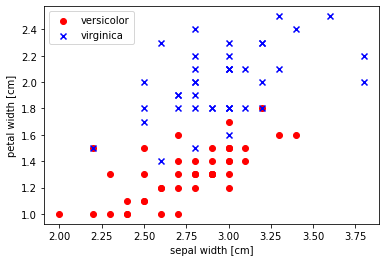

In [6]:
%matplotlib inline

# select versicolor and verginica
y = df.iloc[55:140, 4].values                  # The last 45 instances of iris versicolor, the first 40 of iris virginica
y = np.where(y == 'Iris-versicolor', -1, 1)       # Code iris versicolor as -1, and iris virginica as 1

# extract sepal width and petal width
X = df.iloc[55:140, [1, 3]].values             # Use column 1 (sepal width) and 3 (petal width) as predictors 

# plot data
plt.scatter(X[:45, 0], X[:45, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[45:85, 0], X[45:85, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

## Perceptron Implementation

In [7]:
# Define Perceptron class
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """

    # Constructor used to create Percepytron objects
    # NOte that eta defaults to 0.01, and n_iter to 50.
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        # Initialize weights to small random mumbers, and initialize errors to be an empty list
        rgen = np.random.RandomState(self.random_state)                   # Initialize random number generator
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])   # weights are initially normal variates with a mean of 0 and a standard deviation of 0.01
        self.errors_ = []

        # For n_iter iterations, compute predictions and updates, update weights, and compute and record errors
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    # Function that calculates weighted input of Perceptron
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Function that applies step function to net_input to calculate and return output of Perceptron 
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

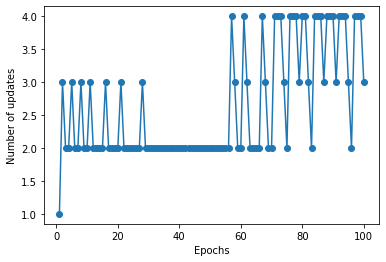

In [8]:
# Create Perceptron object called ppn
ppn = Perceptron(eta=0.1, n_iter=100)

# Fit Perceptron model to iris data 
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

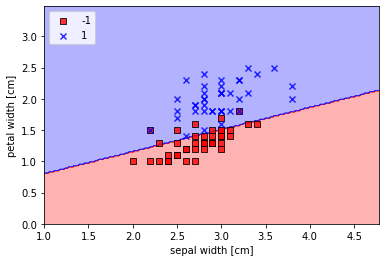

In [9]:
# Plot decision region
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

In [10]:
# Split the data into a holdout training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
# Scale predictor data to have mean zero and unit variance
scaler = StandardScaler()
scaler.fit(X_train)   # Obtain scaling parameters from training data
X_train_std = scaler.transform(X_train)    # Now use those parameters to scale the training data
X_test_std = scaler.transform(X_test)          # And test data SEPARATELY (to prevent data leakags)

In [12]:
# Fit a Perceptron model
ppn = sklearn.linear_model.Perceptron(eta0=0.01, max_iter = 100, random_state=3)

# Train Perceptron
ppn.fit(X_train_std, y_train)

# Predict target values for X_test_std
y_hat = ppn.predict(X_test_std)

# Report confusion matrix and accuracy
cm = confusion_matrix(y_hat,y_test)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy) 

Confusion matrix
 [[12.  0.]
 [ 1.  9.]] 

Accuracy =  0.9545454545454546


## Adaline Implementation

In [13]:
class AdalineGD(object):
    """ADAptive LInear NEuron (Adaline) classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

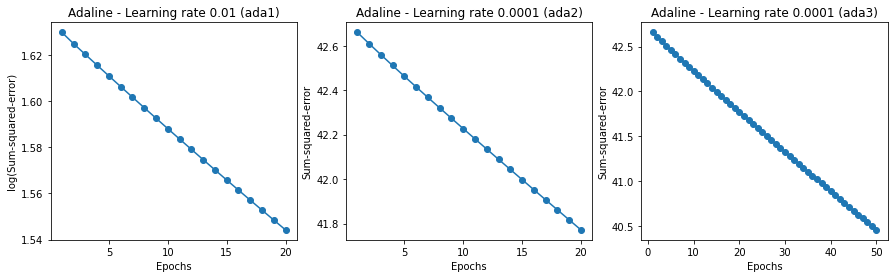

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ada1 = AdalineGD(n_iter=20, eta=0.001).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01 (ada1)')

ada2 = AdalineGD(n_iter=20, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001 (ada2)')

ada3 = AdalineGD(n_iter=50, eta=0.0001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.0001 (ada3)')
plt.show()

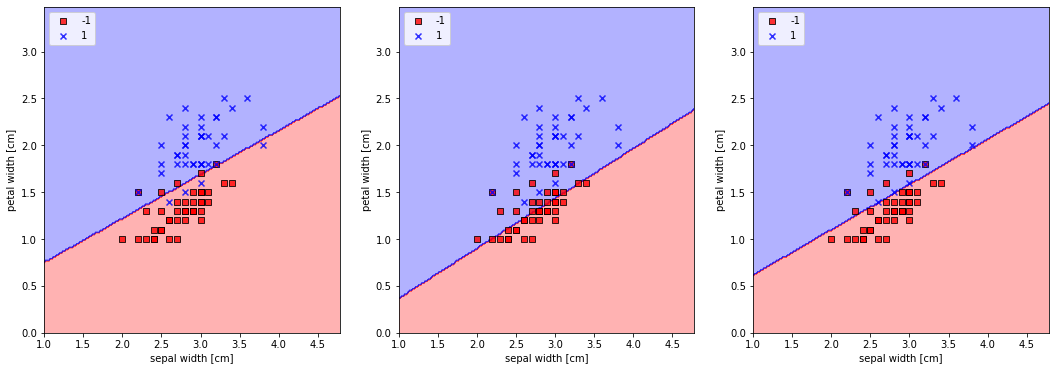

In [15]:
# Plot decision region
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
plot_decision_regions(X, y, classifier=ada1)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.subplot(1,3,2)
plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.subplot(1,3,3)
plot_decision_regions(X, y, classifier=ada3)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

In [16]:
# Produce confusion matrix and print accuracy
y_hat = ada1.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada1 model)\n",cm, "\n\nAccuracy = ",accuracy)   

y_hat = ada2.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada2 model)\n",cm, "\n\nAccuracy = ",accuracy)   

y_hat = ada3.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada3 model)\n",cm, "\n\nAccuracy = ",accuracy)  

Confusion matrix (ada1 model)
 [[40  5]
 [ 4 36]] 

Accuracy =  0.8941176470588236
Confusion matrix (ada2 model)
 [[27 18]
 [ 0 40]] 

Accuracy =  0.788235294117647
Confusion matrix (ada3 model)
 [[39  6]
 [ 0 40]] 

Accuracy =  0.9294117647058824


## Improving Gradient Descent through feature scaling

In [17]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

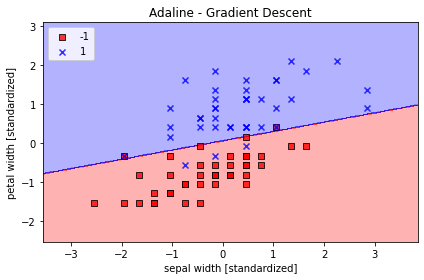

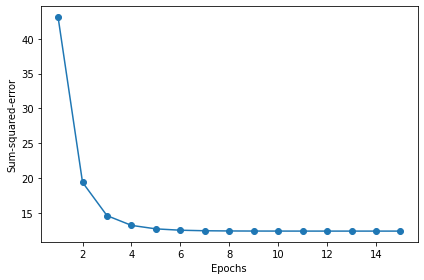

In [18]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()

plt.show()

In [19]:
# Compute confusion matrix
y_hat = ada.predict(X_std)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (standardized data model)\n",cm, "\n\nAccuracy = ",accuracy)    

Confusion matrix (standardized data model)
 [[43  2]
 [ 3 37]] 

Accuracy =  0.9411764705882353


## Adaline Stochastic Gradient Descent Implementation

In [20]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

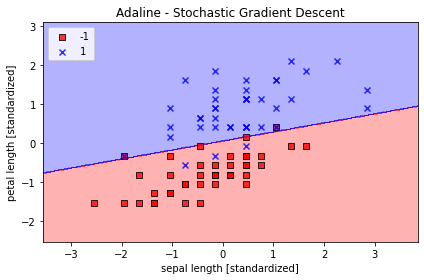

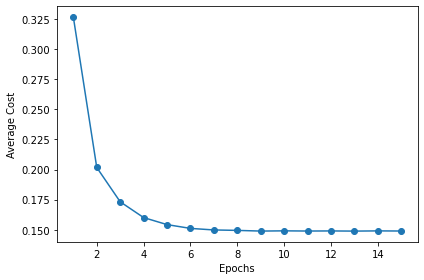

In [21]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()

plt.show()

In [22]:
# Compute confusion matrix
y_hat = ada.predict(X_std)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (stochastic gradient descent model)\n",cm, "\n\nAccuracy = ",accuracy)     

Confusion matrix (stochastic gradient descent model)
 [[42  3]
 [ 3 37]] 

Accuracy =  0.9294117647058824


## Logistic Regression Classifier

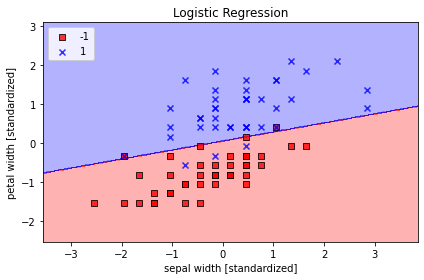

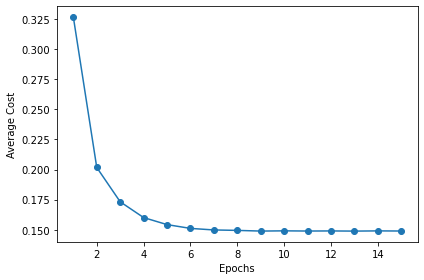

Confusion matrix
 [[43  2]
 [ 4 36]] 

Accuracy =  0.9294117647058824


In [23]:
# sklearn implementation of LogisticRegression Classifier

# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create logit instance and fit model
logreg = LogisticRegression()
logreg.fit(X_std, y)

# Plot decision regions
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Logistic Regression')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()

plt.show()

# Compute confusion matrix
y_hat = logreg.predict(X_std)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy) 

## Sklearn implementation of SGDClassifier

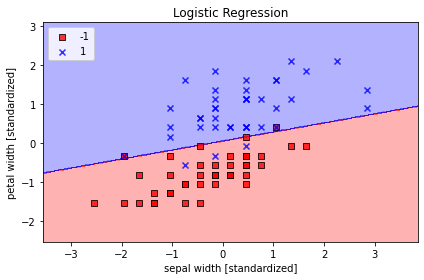

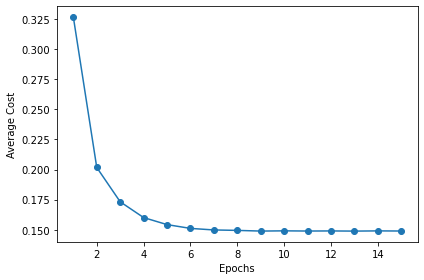

Confusion matrix 
 [[43  2]
 [ 4 36]] 

Accuracy =  0.9294117647058824


In [24]:
# sklearn implementation of SGDClassifier

# Import libraries
from sklearn.linear_model import SGDClassifier

# Create logit instance and fit model
SGD = SGDClassifier(loss="log",eta0=0.01)
SGD.fit(X_std, y)

# Plot decision regions
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Logistic Regression')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()

plt.show()

# Compute confusion matrix
y_hat = SGD.predict(X_std)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix \n",cm, "\n\nAccuracy = ",accuracy) 